In [1]:
2+2

4

In [3]:
print("Hello World")

Hello World


In [2]:
#USE IT

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# General data about Electric vehicles, battery information, range, top speed, etc.
ev_info = pd.read_csv("./dataset/EV_data.csv")

# EV sales (count) by month with information on make and model
ev_sales = pd.read_csv("./dataset/adoption.csv")

# Co2 emissions data per country capita, will be using US
co2 = pd.read_csv("./dataset/world_bank_co2.csv")


#tmeparature change based on NASA giss data
temperature = pd.read_csv("./dataset/temp_change.csv", sep='\t')

# Costs of Gasoline and Electricity
fuel_price = pd.read_csv("./dataset/fuel_price.csv")

#FRED electricity costs city average
electric = pd.read_csv("./dataset/electric.csv")

#FRED general vehicle sales
g_sales = pd.read_csv("./dataset/general_sales.csv")

#FRED Producer Price Index for semicondoctors and chip components
chip = pd.read_csv("./dataset/chip_cost.csv")

# FRED Insurance PPI Auto
insurance = pd.read_csv("./dataset/insurance.csv", sep='\t')

#teslaStock
tesla_stock = pd.read_csv("./dataset/tesla_stock.csv", sep='\t')
#charging locations
# charge = pd.read_csv("./dataset/charging_loc.csv")
# print(fuel_price)





In [4]:
#USE IT
# Generate descriptive statistics for each dataset
desc_stats_ev_info = ev_info.describe()
desc_stats_ev_sales = ev_sales.describe()
desc_stats_co2 = co2.describe()
desc_stats_temperature = temperature.describe()
desc_stats_fuel_price = fuel_price.describe()
desc_stats_electric = electric.describe()
desc_stats_g_sales = g_sales.describe()
desc_stats_chip = chip.describe()
desc_stats_insurance = insurance.describe()
desc_stats_teslaStock = tesla_stock.describe()

print(desc_stats_ev_info)
print(desc_stats_ev_sales)

         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm       Seats  \
count  103.000000    103.000000  103.000000       103.000000  103.000000   
mean     7.396117    179.194175  338.786408       189.165049    4.883495   
std      3.017430     43.573030  126.014444        29.566839    0.795834   
min      2.100000    123.000000   95.000000       104.000000    2.000000   
25%      5.100000    150.000000  250.000000       168.000000    5.000000   
50%      7.300000    160.000000  340.000000       180.000000    5.000000   
75%      9.000000    200.000000  400.000000       203.000000    5.000000   
max     22.400000    410.000000  970.000000       273.000000    7.000000   

           PriceEuro  
count     103.000000  
mean    55811.563107  
std     34134.665280  
min     20129.000000  
25%     34429.500000  
50%     45000.000000  
75%     65000.000000  
max    215000.000000  
           Vehicle  Type   2011   2012   2013   2014   2015   2016   2017  \
count           56    55     56

EV Sales DataFrame columns: Index(['Year', 'Sales'], dtype='object')
        Year     Sales
0 2011-01-01   35526.0
1 2012-01-01  106342.0
2 2013-01-01  194204.0
3 2014-01-01  237764.0
4 2015-01-01  228046.0


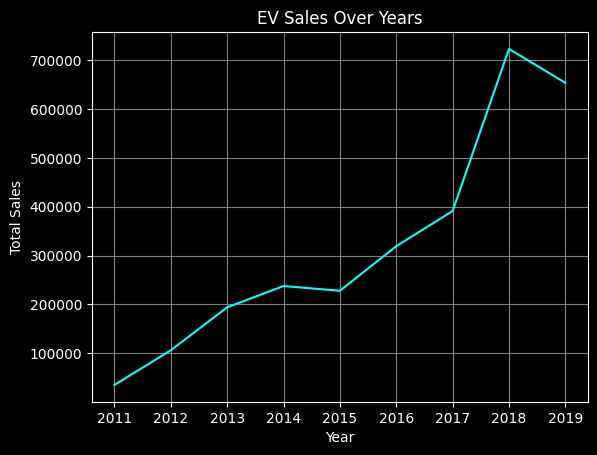

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ev_sales and co2 DataFrames are already defined
# Print the columns to confirm
print("EV Sales DataFrame columns:", ev_sales.columns)

# Ensure 'Year' is in datetime format
ev_sales['Year'] = pd.to_datetime(ev_sales['Year'], format='%Y')

# Show the first few rows of the transformed data
print(ev_sales.head())

co2 = pd.read_csv("./dataset/world_bank_co2.csv")
# Ensure the 'DATE' column in co2 is also in datetime format
co2['DATE'] = pd.to_datetime(co2['DATE'])

# Merging the yearly CO2 emissions with EV sales
ev_co2_merged = pd.merge(ev_sales, co2, left_on='Year', right_on='DATE', how='left')

# Convert the 'Sales' column to numeric, ensuring all non-convertible values are handled
ev_co2_merged['Sales'] = pd.to_numeric(ev_co2_merged['Sales'], errors='coerce')

# Regroup and sum the sales after conversion to handle any NaN values that might have been introduced
ev_sales_grouped = ev_co2_merged.groupby(ev_co2_merged['Year'].dt.year)['Sales'].sum()

# Set the style to dark background
plt.style.use('dark_background')

# Plotting the data
fig, ax = plt.subplots()
ev_sales_grouped.plot(ax=ax, title='EV Sales Over Years', color='cyan')  # Change color for better visibility on dark background
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Total Sales', color='white')

# Set grid and ticks color
ax.grid(True, color='gray')
ax.tick_params(axis='both', colors='white')

# Save and show the plot
plt.savefig('./dataset/images/ev_sales_plot.png', bbox_inches='tight')
plt.show()


           Vehicle  Type       Year  Sales
0       Chevy Volt  PHEV 2011-01-01  7,671
1      Nissan Leaf    EV 2011-01-01  9,674
2         Smart ED    EV 2011-01-01    342
3  Mitsubishi I EV    EV 2011-01-01     76
4     BMW Active E    EV 2011-01-01   -   


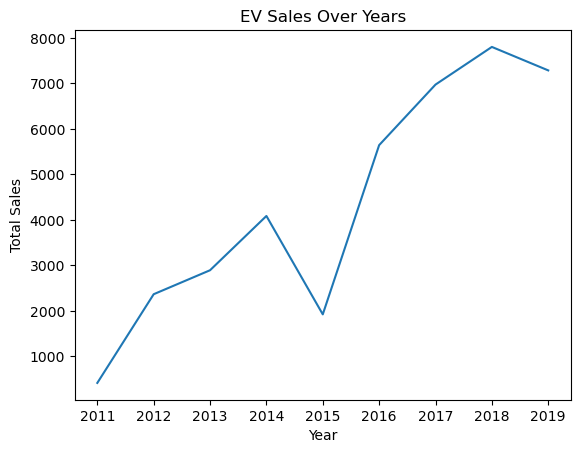

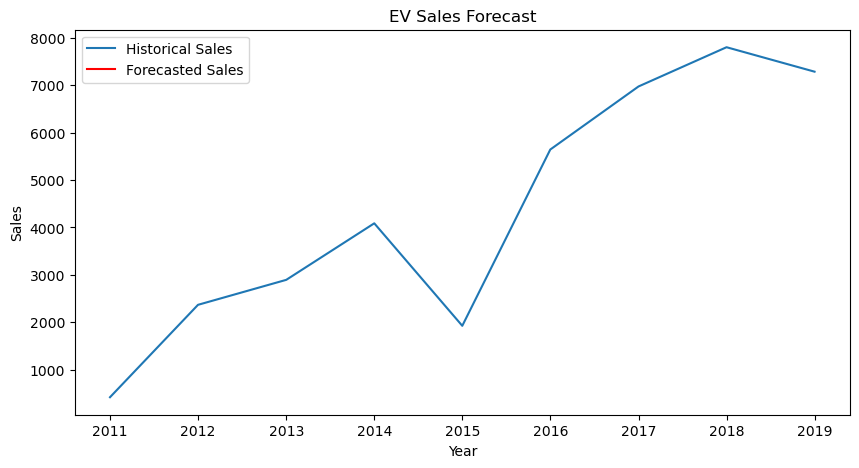

21:55:20 - cmdstanpy - INFO - Chain [1] start processing
21:55:20 - cmdstanpy - INFO - Chain [1] done processing


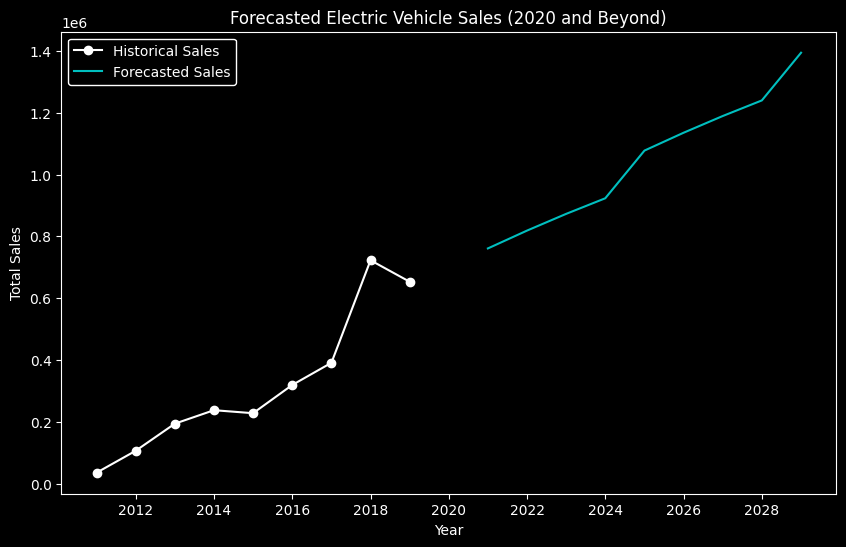

In [20]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load and prepare the data
adoption = pd.read_csv('./dataset/adoption.csv')
for col in adoption.columns[2:12]:
    adoption[col] = pd.to_numeric(adoption[col].str.replace(',', '').str.strip(), errors='coerce')
yearly_totals = adoption.loc[:, '2011':'2019'].sum().reset_index()
yearly_totals.columns = ['ds', 'y']
yearly_totals['ds'] = pd.to_datetime(yearly_totals['ds'], format='%Y')
yearly_totals['y'] = yearly_totals['y'].astype(int)  # Ensure sales totals are integers

# Initialize and fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(yearly_totals)

# Create a future dataframe starting from 2020
future = model.make_future_dataframe(periods=10, freq='YE')
future = future[future['ds'].dt.year > 2019]  # Keep only future dates

# Forecast
forecast = model.predict(future)

# Customizing the plot aesthetics
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_totals['ds'], yearly_totals['y'], 'wo-', label='Historical Sales')
ax.plot(forecast['ds'], forecast['yhat'], 'c-', label='Forecasted Sales')
ax.set_title('Forecasted Electric Vehicle Sales (2020 and Beyond)', color='white')
ax.set_xlabel('Year', color='white')
ax.set_ylabel('Total Sales', color='white')
ax.tick_params(colors='white')
ax.legend(facecolor='black', edgecolor='white', framealpha=1, loc='upper left')

# Save the graph as a PNG file
output_path = './dataset/images/ev_sales_forecasted.png'
plt.savefig(output_path)
plt.show()


In [16]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


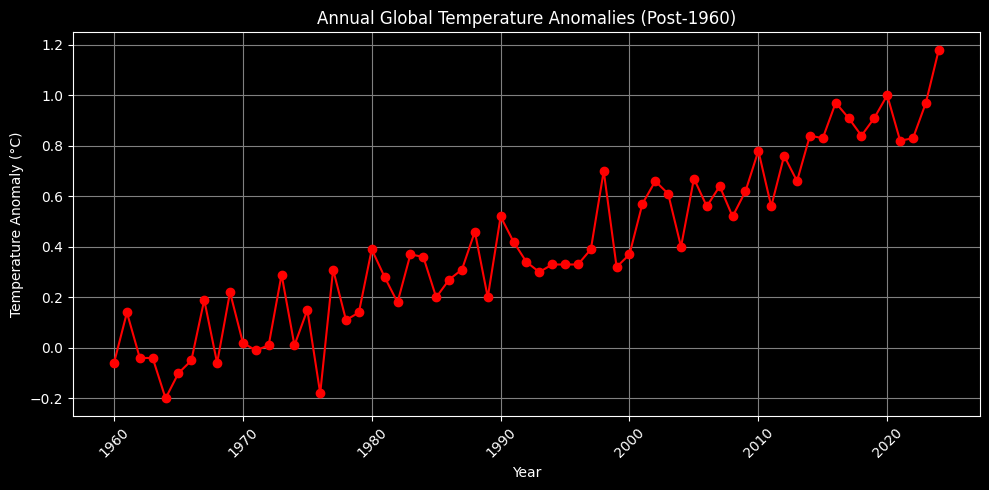

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature change data
temp_change = pd.read_csv('./dataset/temp_change.csv')

# Ensure the 'Year' column is in a proper datetime format
temp_change['Year'] = pd.to_datetime(temp_change['Year'], format='%Y')

# Filter data for years after 1960
temp_change_filtered = temp_change[temp_change['Year'] >= pd.Timestamp('1960-01-01')]

# Plotting the temperature anomalies
plt.figure(figsize=(10, 5))
plt.plot(temp_change_filtered['Year'], temp_change_filtered['Anomaly'], marker='o', linestyle='-', color='red')

# Beautify the graph with a black background and white font
plt.title('Annual Global Temperature Anomalies (Post-1960)', color='white')
plt.xlabel('Year', color='white')
plt.ylabel('Temperature Anomaly (°C)', color='white')
plt.grid(True, color='gray')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap

# Save the plot
output_path = './dataset/images/global_temp.png'
plt.savefig(output_path, facecolor='black')  # Save with black background
plt.show()


   Year     Sales  CO2_Emissions
0  2011   35526.0    5449.900033
1  2012  106342.0    5229.594013
2  2013  194204.0    5361.090748
3  2014  237764.0    5417.285716
4  2015  228046.0    5267.385812


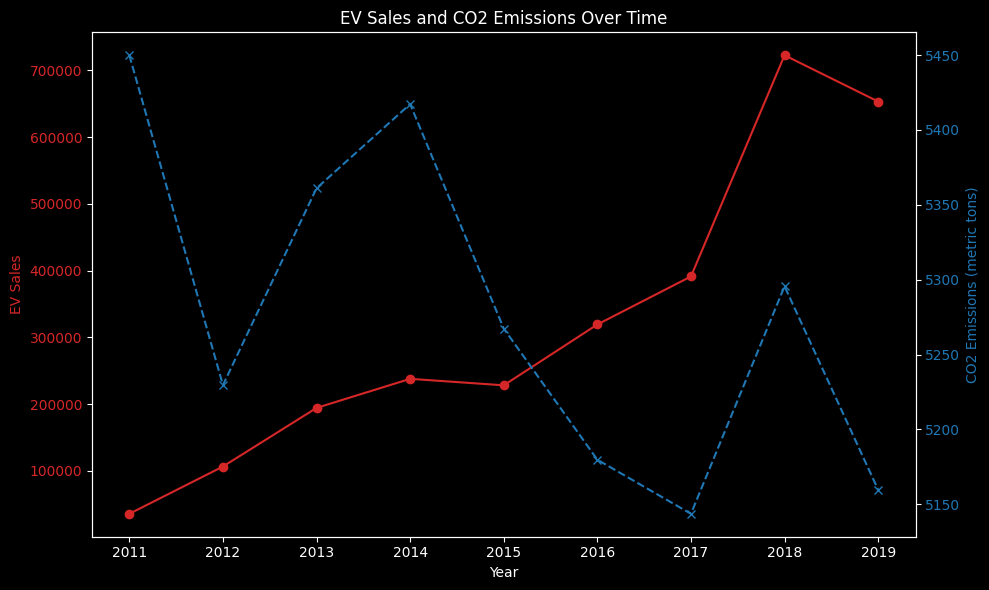

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
adoption = pd.read_csv('./dataset/adoption.csv')
co2_emissions = pd.read_csv('./dataset/world_bank_co2.csv')

# Clean and prepare the EV sales data
year_columns = [str(year) for year in range(2011, 2020)]  # Adjust range as necessary
adoption_melted = adoption.melt(id_vars=['Vehicle', 'Type'], value_vars=year_columns, var_name='Year', value_name='Sales')
adoption_melted['Year'] = pd.to_numeric(adoption_melted['Year'], errors='coerce')
adoption_melted['Sales'] = pd.to_numeric(adoption_melted['Sales'].str.replace(',', '').str.strip(), errors='coerce')

# Aggregate sales by year
ev_sales = adoption_melted.groupby('Year')['Sales'].sum().reset_index()

# Clean and prepare the CO2 emissions data
co2_emissions['Year'] = pd.to_datetime(co2_emissions['DATE']).dt.year  # Extract the year from the 'Date' column
co2_emissions.rename(columns={'EMISSCO2TOTVTTTOUSA': 'CO2_Emissions'}, inplace=True)
co2_emissions['CO2_Emissions'] = pd.to_numeric(co2_emissions['CO2_Emissions'], errors='coerce')

# Aggregate CO2 emissions by year if necessary
co2_annual = co2_emissions.groupby('Year')['CO2_Emissions'].sum().reset_index()

# Align datasets by year
combined_data = pd.merge(ev_sales, co2_annual, on='Year', how='inner')

# Display the cleaned and combined data
print(combined_data.head())

# Plotting the data with customizations for black background and white font
plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating the first axis for EV sales
color = 'tab:red'
ax1.set_xlabel('Year', color='white')
ax1.set_ylabel('EV Sales', color=color)
ax1.plot(combined_data['Year'], combined_data['Sales'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', colors='white')

# Creating a second axis for CO2 emissions sharing the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('CO2 Emissions (metric tons)', color=color)
ax2.plot(combined_data['Year'], combined_data['CO2_Emissions'], color=color, marker='x', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and customizing layout
plt.title('EV Sales and CO2 Emissions Over Time', color='white')
fig.tight_layout()

# Saving the plot
output_path = './dataset/images/ev_co2.png'
plt.savefig(output_path)

# Show plot
plt.show()


In [29]:
# Load the CO2 emissions data
co2_emissions = pd.read_csv('./dataset/world_bank_co2.csv')

# Print the column names to verify
print(co2_emissions.columns)


Index(['DATE', 'EMISSCO2TOTVTTTOUSA'], dtype='object')


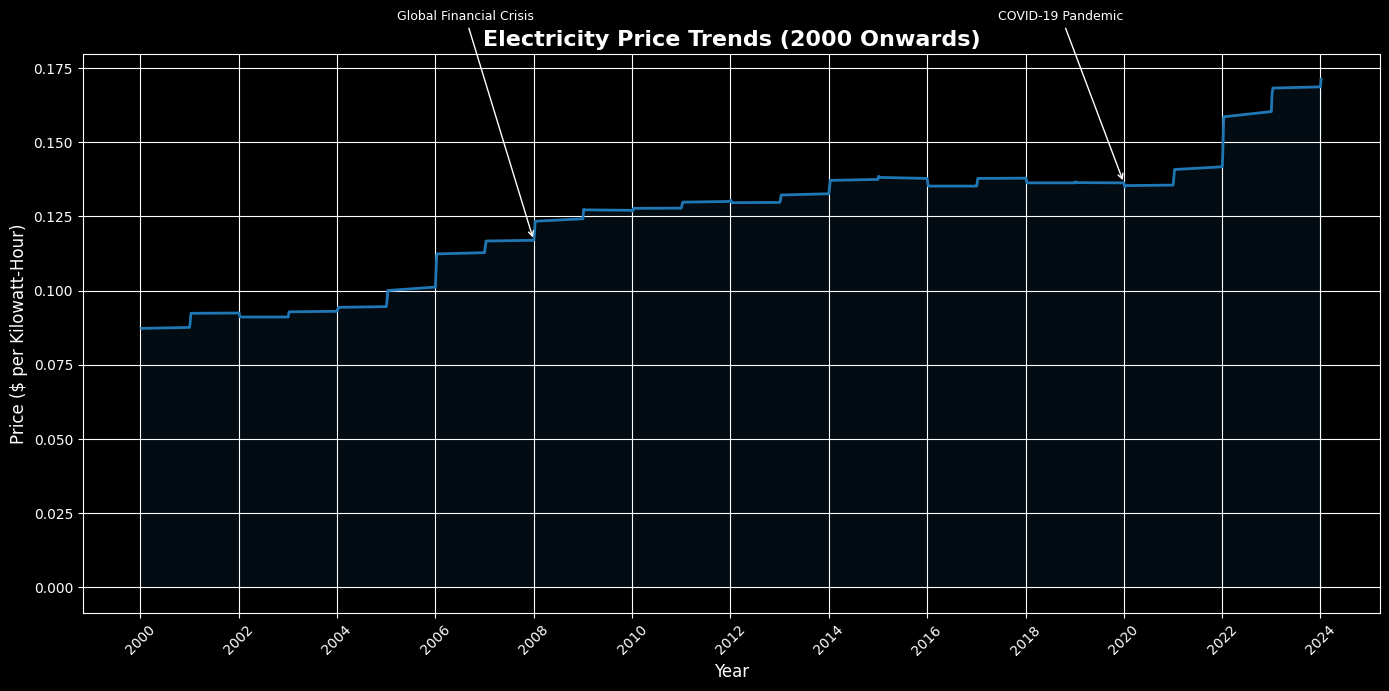

In [17]:
#USE IT Electricity price
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
electric_prices = pd.read_csv('./dataset/electric.csv')

# Parse the 'DATE' column and convert the 'Electricity per Kilowatt-Hour' to numeric
electric_prices['Date'] = pd.to_datetime(electric_prices['DATE'], errors='coerce')
electric_prices['Price'] = pd.to_numeric(electric_prices['Electricity per Kilowatt-Hour'], errors='coerce')

# Filter the data to include only entries from the year 2000 onwards
electric_prices = electric_prices[electric_prices['Date'].dt.year >= 2000]
# Calculate the rolling mean with a window of 12 months
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming electric_prices is already loaded and filtered
# Calculate the rolling mean with a window of 12 months
electric_prices['Rolling Mean'] = electric_prices['Price'].rolling(window=12).mean()

# Create a visually appealing plot
plt.figure(figsize=(14, 7))
ax = plt.gca()

# Plotting the rolling average
ax.plot(electric_prices['Date'], electric_prices['Rolling Mean'], color='#1f77b4', linewidth=2)

# Highlight the area under the curve
ax.fill_between(electric_prices['Date'], electric_prices['Rolling Mean'], color='#1f77b4', alpha=0.1)

# Formatting the date on the x-axis
ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Set major ticks interval every two years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Adding annotations for significant events or changes
significant_dates = {
    '2008-01-01': 'Global Financial Crisis',
    '2020-01-01': 'COVID-19 Pandemic'
}
for date, event in significant_dates.items():
    ax.annotate(event, xy=(pd.Timestamp(date), electric_prices.loc[electric_prices['Date'] == pd.Timestamp(date), 'Rolling Mean'].max()),
                xytext=(pd.Timestamp(date), electric_prices['Rolling Mean'].max() + 0.02),
                arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'),
                fontsize=9, horizontalalignment='right')

# Improve the title and labels
plt.title('Electricity Price Trends (2000 Onwards)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($ per Kilowatt-Hour)', fontsize=12)
plt.grid(True)

# Rotate date labels slightly
plt.xticks(rotation=45)
plt.tight_layout()
output_path = './dataset/images/electricityPrice.png'
plt.savefig(output_path)
plt.show()




Dataset Head:
         Date      Open      High       Low     Close  Adj Close    Volume
0  2011-01-21  1.541333  1.572667  1.514000  1.536000   1.536000  18255000
1  2011-01-24  1.568667  1.654000  1.548667  1.632667   1.632667  24676500
2  2011-01-25  1.643333  1.659333  1.601333  1.645333   1.645333  19072500
3  2011-01-26  1.647333  1.658667  1.606667  1.650000   1.650000  16198500
4  2011-01-27  1.649333  1.672000  1.635333  1.661333   1.661333  13435500

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2012 non-null   object 
 1   Open       2012 non-null   float64
 2   High       2012 non-null   float64
 3   Low        2012 non-null   float64
 4   Close      2012 non-null   float64
 5   Adj Close  2012 non-null   float64
 6   Volume     2012 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_10076\1448818629.py:27: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df['Close'].resample('Y').last()


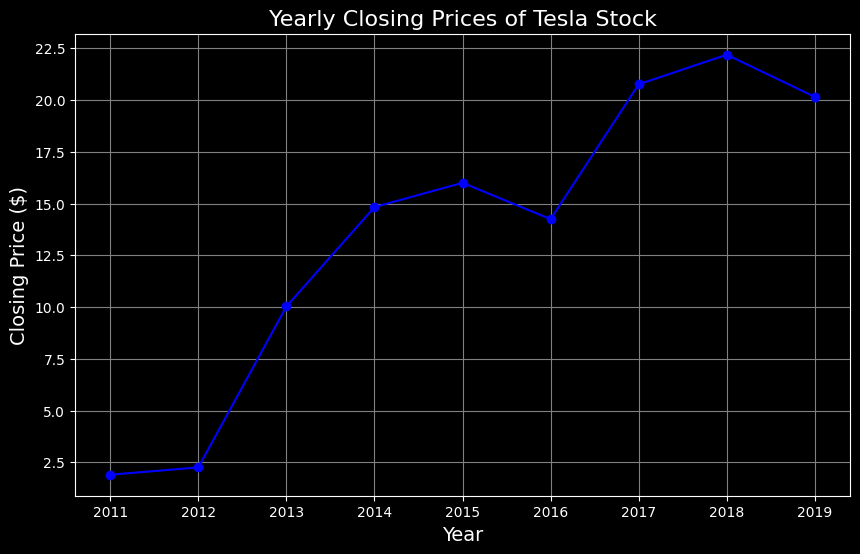

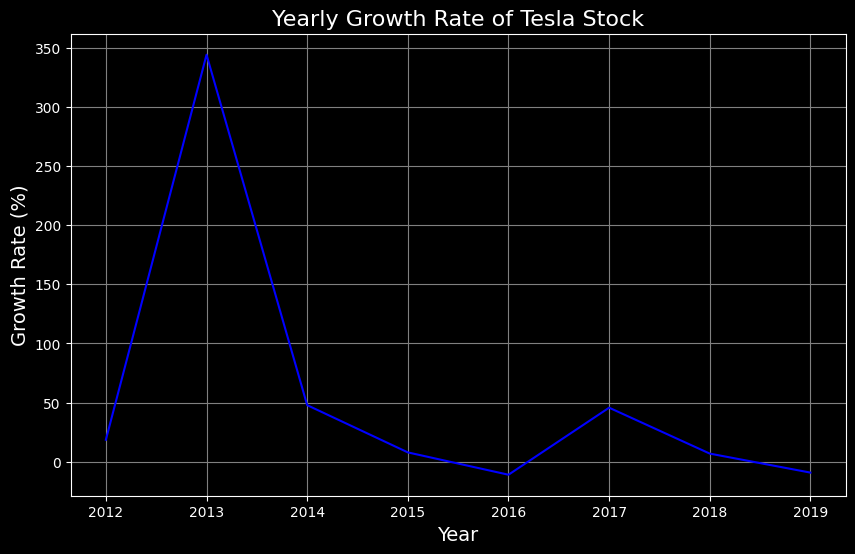

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './dataset/tesla_stock.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Resample the data to get the last closing price of each year
yearly_data = df['Close'].resample('Y').last()

# Calculate the yearly growth rate
yearly_growth = yearly_data.pct_change() * 100

# Set the plot style
plt.style.use('dark_background')

# Plot the yearly closing prices
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index.year, yearly_data, marker='o', linestyle='-', color='b')
plt.title('Yearly Closing Prices of Tesla Stock', color='white', fontsize=16)
plt.xlabel('Year', color='white', fontsize=14)
plt.ylabel('Closing Price ($)', color='white', fontsize=14)
plt.grid(True, color='gray')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

# Plot the yearly growth rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_growth.index.year, yearly_growth, color='b')
plt.title('Yearly Growth Rate of Tesla Stock', color='white', fontsize=16)
plt.xlabel('Year', color='white', fontsize=14)
plt.ylabel('Growth Rate (%)', color='white', fontsize=14)
plt.grid(True, color='gray')
plt.xticks(color='white')
plt.yticks(color='white')
output_path = './dataset/images/teslaStock.png'
plt.savefig(output_path, bbox_inches='tight', facecolor='black')
plt.show()


In [18]:
pip install pandas matplotlib seaborn



SyntaxError: invalid syntax (2662850732.py, line 1)

In [19]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_10076\1456881282.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='PriceEuro', data=average_prices, palette='viridis')


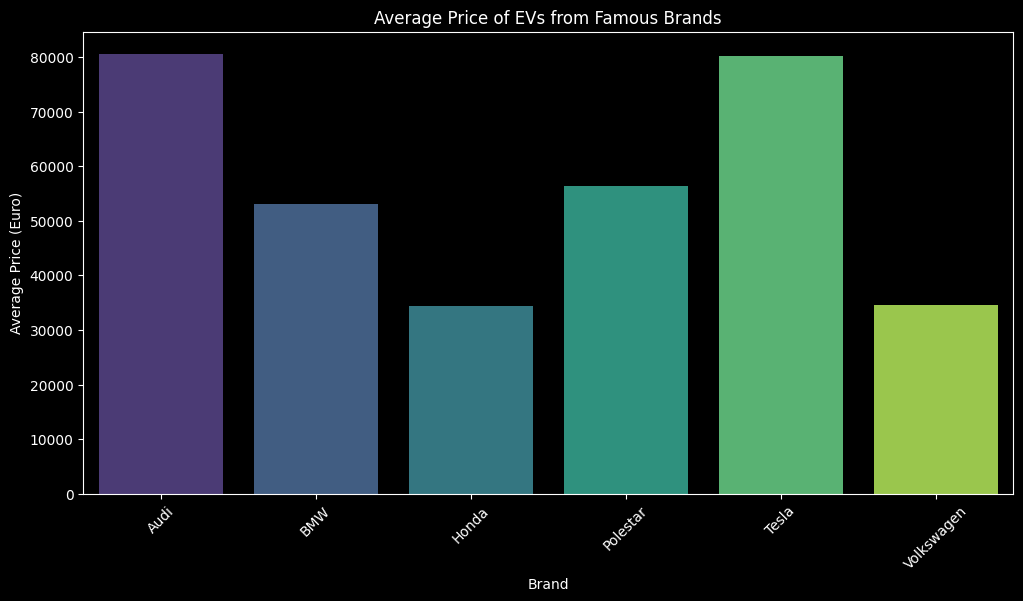

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './dataset/EV_data.csv'
ev_data = pd.read_csv(file_path)

# Remove trailing spaces from brand names
ev_data['Brand'] = ev_data['Brand'].str.strip()

# Select six famous brands
famous_brands = ['Tesla', 'Volkswagen', 'BMW', 'Honda', 'Polestar', 'Audi']

# Filter the dataset for the selected brands
filtered_ev_data = ev_data[ev_data['Brand'].isin(famous_brands)]

# Calculate the average price of EVs for each brand
average_prices = filtered_ev_data.groupby('Brand')['PriceEuro'].mean().reset_index()

# Beautify the plot
plt.style.use('dark_background')

# Plot the average prices of EVs for the selected brands
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='PriceEuro', data=average_prices, palette='viridis')

# Customize the plot with white text
plt.title('Average Price of EVs from Famous Brands', color='white')
plt.xlabel('Brand', color='white')
plt.ylabel('Average Price (Euro)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Save and show the plot
output_path = './dataset/images/avgPriceEV.png'
plt.savefig(output_path, facecolor='black')
plt.show()
